In [1]:
import sys
sys.path.append('/Users/jonas/DL_scratch2') # use parents directory files
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

In [2]:
text = 'You say goodbye and I say hello. I will follow you wherever you go.'
corpus, wtoi, itow = preprocess(text)
vocab_size = len(wtoi)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

In [7]:
print('shape of W: {}'.format(W.shape))
W[wtoi['hello']]

shape of W: (11, 11)


array([0.       , 1.9068906, 0.       , 0.       , 0.       , 0.       ,
       2.321928 , 0.       , 0.       , 0.       , 0.       ],
      dtype=float32)

### SVD에 의한 차원 감소

위는 'hello'의 ppmi vector이다. 0이 많은 sparse vector라 할 수 있다. 좀 더 밀집한 vector로 만들어줄 필요가 있다.

중요한 정보를 남기면서 matrix의 사이즈를 줄이는 것이 SVD: Singular Value Decomposition 이다.

In [8]:
U, S, V = np.linalg.svd(W)
U[wtoi['hello']]

array([-0.2897133 ,  0.2984982 ,  0.10817307,  0.08706231,  0.4089331 ,
       -0.4163879 , -0.1869991 ,  0.19241607, -0.4563248 , -0.42033014,
       -0.10087755], dtype=float32)

차원을 줄이려면 단순히 앞에서부터의 숫자들을 꺼내면 된다.

    ex. 'hello'를 2차원으로 줄이려면? U[wtoi['hello']] 의 앞 두 숫자만 가져오면 됨

In [9]:
U[wtoi['hello']][:2]

array([-0.2897133,  0.2984982], dtype=float32)

각 단어를 2차원 벡터로 표현한 후 2차원 공간에 나타내 보기

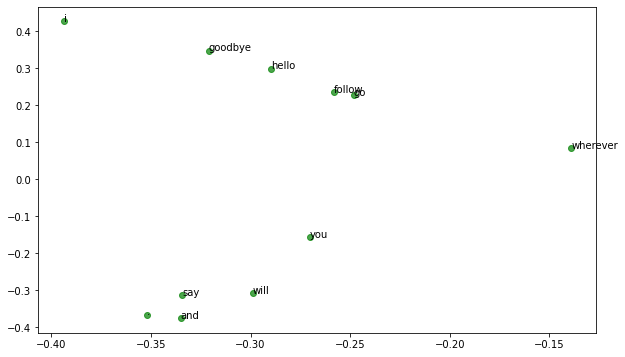

In [18]:
plt.figure(figsize=(10, 6))
for word, word_id in wtoi.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1])) # add labels

plt.scatter(U[:,0], U[:,1], alpha=0.7, color='g')
plt.show()